# Data visualization
This notebook about data visualization of some match in game 'Dota 2'. Where we have 2 teams: **dire** and **radiant** and first one is winner.
Firstly, we start with some visualization data of match.

### First graph of advantages in gold and experience of teams.
(if one has advantage, second has disadvantage)

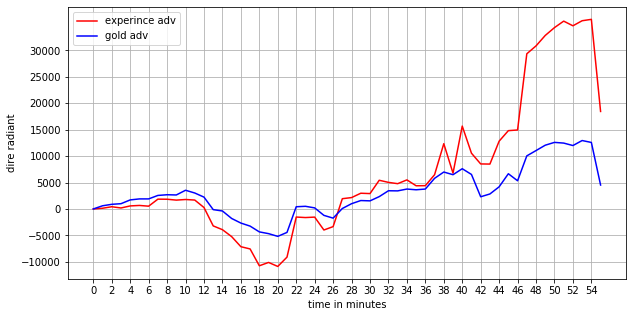

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

file = open("match.json",)
data = json.load(file)
file.close()

y_gold = np.array(data["radiant_gold_adv"])
y_xp = np.array(data["radiant_xp_adv"])
x = np.arange(0, y_xp.size)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y_xp, color="red", label="experince adv")
ax.plot(x, y_gold, color="blue", label="gold adv")
ax.grid()
ax.set_xticks(np.arange(np.min(x), np.max(x), 2))
ax.set_yticks(np.arange(-10000, 35000, 5000))
ax.set_xlabel("time in minutes")
ax.set_ylabel("dire radiant")
ax.legend()

How we can see from the graph, first 10 minutes team **radiant team** lead the game in gold and experience. But next 10 minutes **dire team** succed take away it from them. However **radiant team** get back it and until end of the game was leader, even so it did not guarantee victory.

### Next 4 graphs present total gold and experience in time.


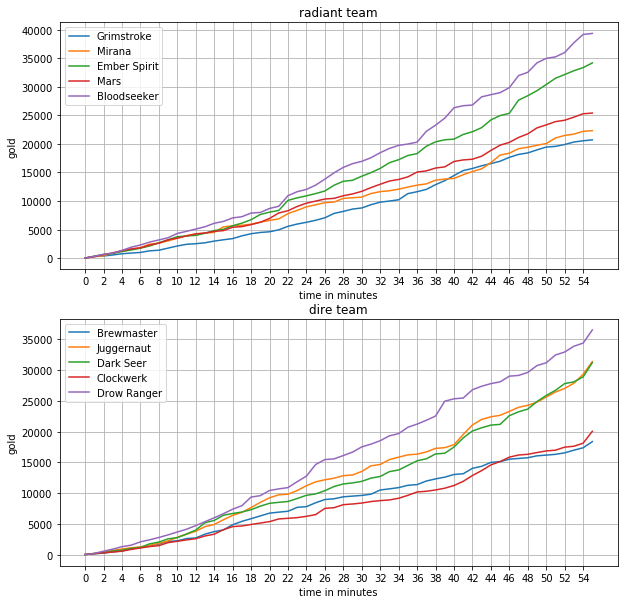

In [2]:
def helperGraph(ax, x_axis, y_axis, str):
    ax.plot(x_axis, y_axis[0][str], label=y_axis[0]['localized_name'])
    ax.plot(x_axis, y_axis[1][str], label=y_axis[1]['localized_name'])
    ax.plot(x_axis, y_axis[2][str], label=y_axis[2]['localized_name'])
    ax.plot(x_axis, y_axis[3][str], label=y_axis[3]['localized_name'])
    ax.plot(x_axis, y_axis[4][str], label=y_axis[4]['localized_name'])
    ax.grid()
    ax.set_xticks(np.arange(np.min(x_axis), np.max(x_axis), 2))
    ax.set_xlabel("time in minutes")
    ax.set_ylabel(str[:-2])
    ax.legend()

def helperName(lst_pls, names):
    for pl in lst_pls:
        i = 0
        while (pl['hero_id'] != names[i]['id']) or (i > 120):
            i += 1
        pl['localized_name'] = names[i]['localized_name']
    
fname = open("hero_names.json",)
dname = json.load(fname)
fname.close()

pls = np.array(data["players"])
radiant_pls = np.array(pls[:5])
helperName(radiant_pls, dname)
dire_pls = np.array(pls[5:])
helperName(dire_pls, dname)

fig_gold = plt.figure(figsize=(10,10))
ax_radiant = fig_gold.add_subplot(2,1,1)
helperGraph(ax_radiant, x, radiant_pls, 'gold_t')
ax_radiant.title.set_text('radiant team')


ax_dire = fig_gold.add_subplot(2,1,2)
helperGraph(ax_dire, x, dire_pls, 'gold_t')
ax_dire.title.set_text('dire team')


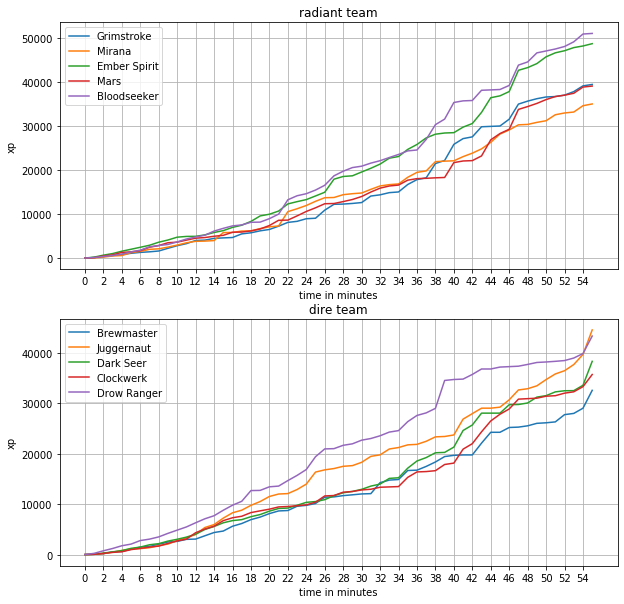

In [3]:
fig_xp = plt.figure(figsize=(10,10))
ax_rad_xp = fig_xp.add_subplot(2,1,1)
helperGraph(ax_rad_xp, x, radiant_pls, 'xp_t')
ax_rad_xp.title.set_text('radiant team')
ax_dire_xp = fig_xp.add_subplot(2,1,2)
helperGraph(ax_dire_xp, x, dire_pls, 'xp_t')
ax_dire_xp.title.set_text('dire team')

# Benchmatks of teams
### Radiant team

In [4]:
import pandas as pd

col_names = []
for elm in radiant_pls[0]['benchmarks'].keys():
    col_names.append(elm)
    col_names.append(elm)
ind = pd.MultiIndex.from_arrays([col_names,['raw', 'pct']*9])

def helperDataFrame(lst_pls, multi_ind):
    her_names = []
    for i in range(0,5):
        her_names.append(lst_pls[i]['localized_name'])
    rows = np.empty((5,18))
    for j in range(0,5):
        for i in range(0,18,2):
            rows[j][i:i+2] = np.fromiter(lst_pls[j]['benchmarks'][col_names[i]].values(), dtype=float)
    df = pd.DataFrame(index=her_names, columns=multi_ind, data=rows)
    return df

radiant_df = helperDataFrame(radiant_pls, ind)
radiant_df

gold_per_min           xp_per_min           kills_per_min  \
                      raw       pct        raw       pct           raw   
Grimstroke          375.0  0.790441      666.0  0.930147      0.090334   
Mirana              404.0  0.732031      620.0  0.765625      0.162602   
Ember Spirit        621.0  0.829457      704.0  0.528424      0.144535   
Mars                459.0  0.603595      620.0  0.596973      0.072267   
Bloodseeker         712.0  0.946309      753.0  0.720358      0.343270   

                       last_hits_per_min           hero_damage_per_min  \
                   pct               raw       pct                 raw   
Grimstroke    0.452206          2.005420  0.713971          530.027100   
Mirana        0.663281          3.306233  0.725000          327.262873   
Ember Spirit  0.249354          8.780488  0.950904         1238.482385   
Mars          0.184484          4.769648  0.586566          519.060524   
Bloodseeker   0.769575          8.635953  0.910515         1399.331527   

                       hero_healing_per_min           tower_damage            \
                   pct                  raw       pct          raw       pct   
Grimstroke    0.808088           158.373984  0.997059          0.0  0.214706   
Mirana        0.294531           157.055104  0.981250        109.0  0.227344   
Ember Spirit  0.838501             2.077687  0.754522       2963.0  0.760982   
Mars          0.510880             0.000000  0.822138       2078.0  0.682119   
Bloodseeker   0.975391             0.000000  0.923937       4915.0  0.610738   

             stuns_per_min           lhten            
                       raw       pct   raw       pct  
Grimstroke        1.578646  0.980147   7.0  0.562178  
Mirana            1.488509  0.584375  27.0  0.851214  
Ember Spirit      2.139433  0.580103  64.0  0.928756  
Mars              1.598248  0.775781  47.0  0.768212  
Bloodseeker       0.439312  0.843400  60.0  0.912556

### Dire team

In [5]:
dire_df = helperDataFrame(dire_pls, ind)
dire_df

gold_per_min           xp_per_min           kills_per_min  \
                     raw       pct        raw       pct           raw   
Brewmaster         346.0  0.235955      531.0  0.353933      0.054201   
Juggernaut         600.0  0.532499      667.0  0.371208      0.216802   
Dark Seer          581.0  0.832134      633.0  0.688249      0.198735   
Clockwerk          383.0  0.740608      625.0  0.830054      0.234869   
Drow Ranger        679.0  0.847176      754.0  0.759967      0.162602   

                      last_hits_per_min           hero_damage_per_min  \
                  pct               raw       pct                 raw   
Brewmaster   0.129213          2.149955  0.123596          459.295393   
Juggernaut   0.513722          6.214995  0.176216          707.100271   
Dark Seer    0.791367          6.829268  0.745803          962.312556   
Clockwerk    0.842576          1.481481  0.398927          895.248419   
Drow Ranger  0.396179          8.762421  0.848837          875.374887   

                      hero_healing_per_min           tower_damage            \
                  pct                  raw       pct          raw       pct   
Brewmaster   0.393258            79.132791  0.943820        889.0  0.449438   
Juggernaut   0.558979           513.369467  0.976408       6896.0  0.571016   
Dark Seer    0.865707           171.472448  0.918465        246.0  0.342926   
Clockwerk    0.946333            17.506775  0.898032        252.0  0.533095   
Drow Ranger  0.759136             0.000000  0.965947      11787.0  0.772425   

            stuns_per_min           lhten            
                      raw       pct   raw       pct  
Brewmaster       3.307194  0.983146  25.0  0.286517  
Juggernaut       0.000000  0.671160  34.0  0.151252  
Dark Seer        0.251928  0.285372  33.0  0.342926  
Clockwerk        2.182758  0.976744  10.0  0.527828  
Drow Ranger      0.000000  0.979236  69.0  0.992519

# Density/Heap map of movements players
Next map show density/heap map of all movements of some player on the map.

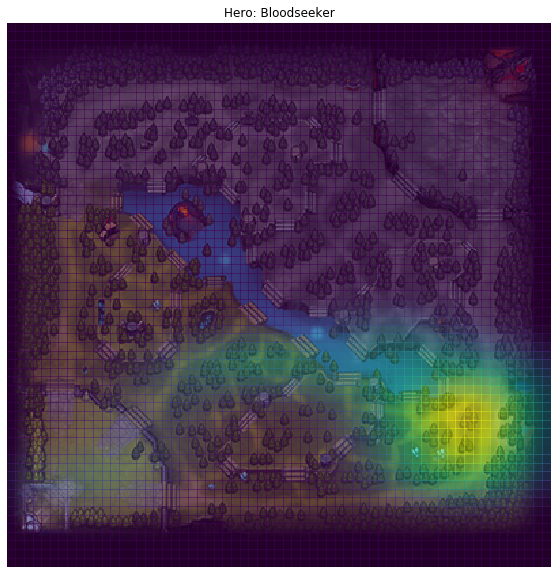

In [82]:
from scipy.stats.kde import gaussian_kde
#write number between 0-4 for players
NUMPL=4

x_cor = np.empty(0, dtype=int)
y_cor = np.empty(0, dtype=int)
for key1 in radiant_pls[NUMPL]['lane_pos'].keys():
    for key2 in radiant_pls[NUMPL]['lane_pos'][key1].keys():
        x_cor = np.append(x_cor, [int(key1)])
        y_cor = np.append(y_cor, [int(key2)])

k = gaussian_kde(np.vstack([x_cor, y_cor]))
xi, yi = np.mgrid[60:188:64j,60:188:64j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))        
        
img = plt.imread("pics\Minimap_7.29.png")
fig, ax = plt.subplots(figsize=(10,10))

ax.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.5, cmap='viridis')
ax.title.set_text('Hero: ' + radiant_pls[NUMPL]['localized_name'])
ax.set_xlim(60,188)
ax.set_ylim(60,188)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')
ax.imshow(img, extent=[60, 188, 60, 188])